<a href="https://colab.research.google.com/github/Nisha-rgb/WM_CNN.ipynb/blob/main/WM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [54]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [55]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [56]:
# Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [57]:
#Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})


100%|██████████| 12565/12565 [00:06<00:00, 1929.31it/s]


In [58]:
data.shape

(22564, 2)

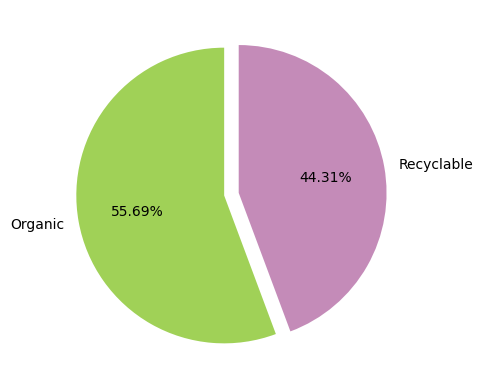

In [59]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'], autopct='%0.2f%%',
        colors = colors,startangle = 90,explode=[0.05, 0.05])
plt.show()


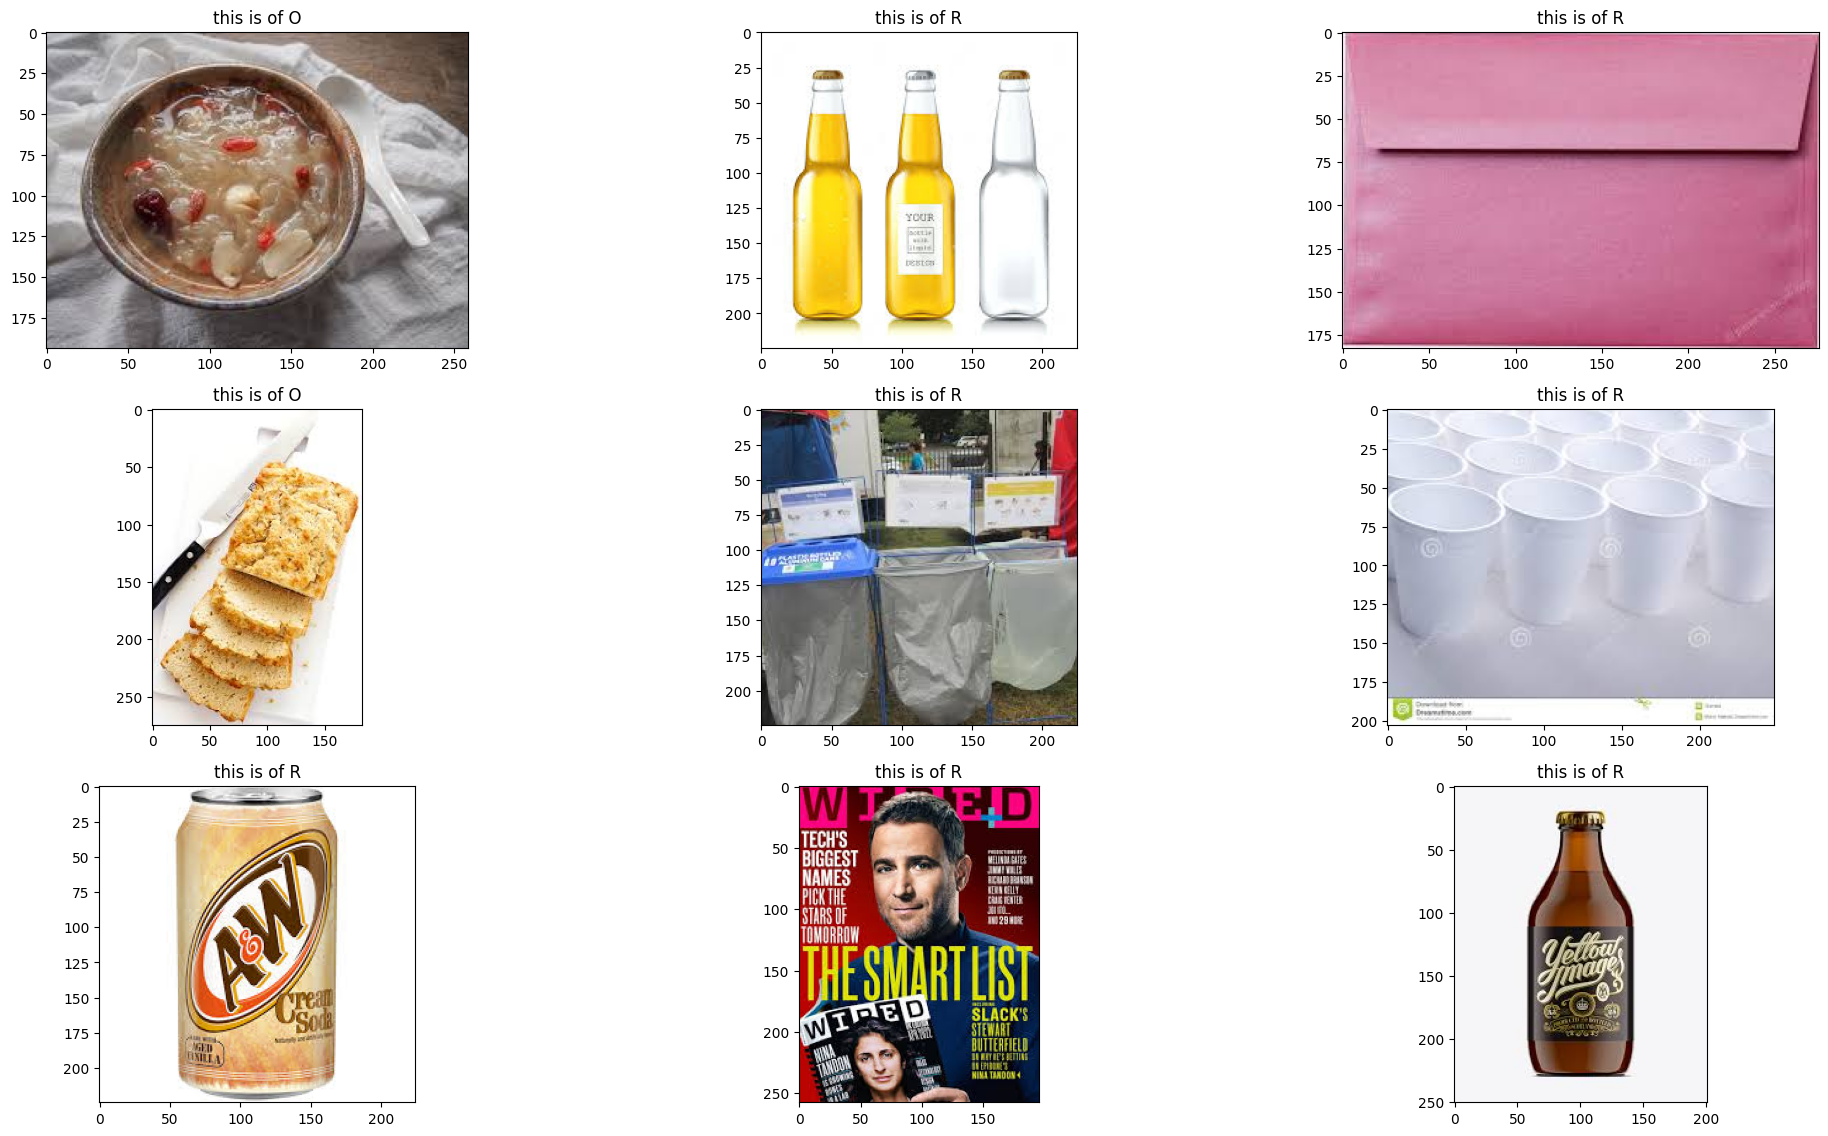

In [60]:
plt.figure(figsize=(20,15))
for i in range(9):
  plt.subplot(4,3,(i%12)+1)
  index = np.random.randint(15000)
  plt.title('this is of {0}'.format(data.label[index]))
  plt.imshow(data.image[index])
  plt.tight_layout()

In [61]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
batch_size = 64


In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [65]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        color_mode = 'rgb',
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        color_mode = 'rgb',
        class_mode='categorical')


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [66]:
hist = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator)

Epoch 1/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 59s 155ms/step - accuracy: 0.7481 - loss: 0.5817 - val_accuracy: 0.8675 - val_loss: 0.3642
Epoch 2/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 74s 138ms/step - accuracy: 0.8423 - loss: 0.3842 - val_accuracy: 0.8918 - val_loss: 0.2981
Epoch 3/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.8641 - loss: 0.3478 - val_accuracy: 0.9021 - val_loss: 0.2699
Epoch 4/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 46s 131ms/step - accuracy: 0.8655 - loss: 0.3347 - val_accuracy: 0.8993 - val_loss: 0.2674
Epoch 5/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.8913 - loss: 0.2756 - val_accuracy: 0.9029 - val_loss: 0.2686


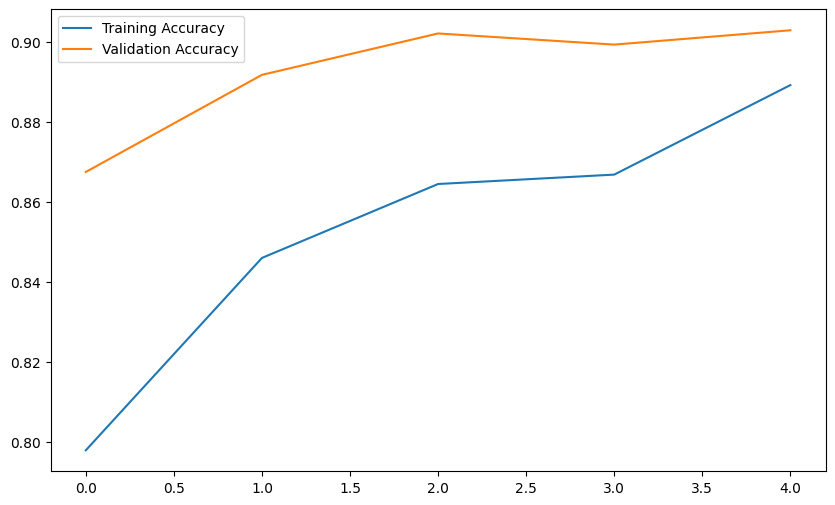

In [73]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

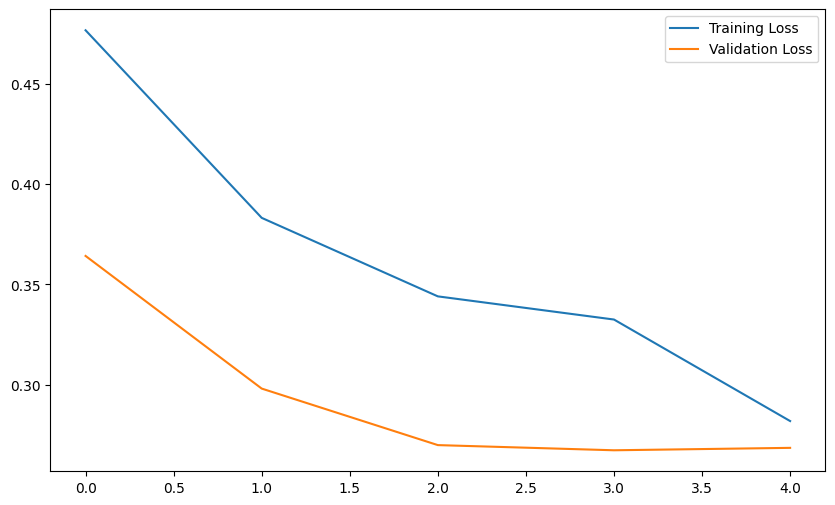

In [74]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [75]:
def predict_fun(img):
  plt.figure(figsize=(6,4))
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[-1,224,224,3])
  result = np.argmax(model.predict(img))
  if result == 0:print('The image shown is Recyclable Waste')
  elif result == 1:print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The image shown is Organic Waste


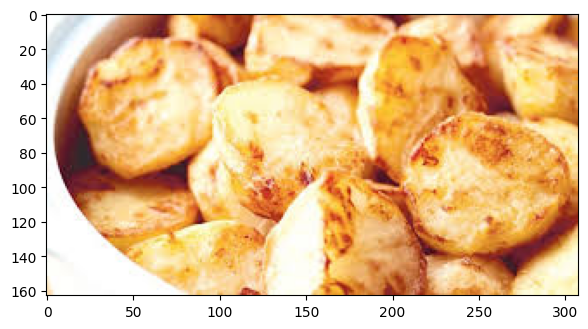

In [76]:
test_img = cv2.imread('/content/O_12926.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The image shown is Organic Waste


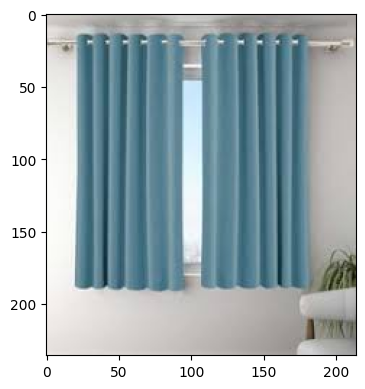

In [78]:
test_img = cv2.imread('/content/R_10181.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
The image shown is Organic Waste


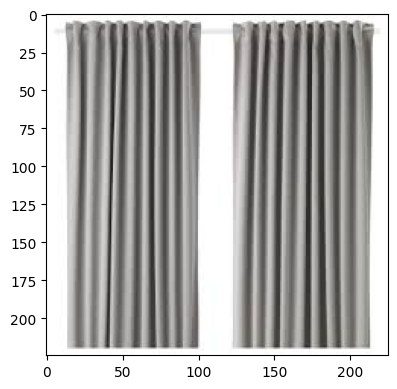

In [77]:
test_img = cv2.imread('/content/R_10028.jpg')
predict_fun(test_img)